In [6]:
from sparse_gpt_neo import SparseGPTNeoForCausalLM
from sparse_roberta import SparseRobertaForMaskedLM
from pretrain import load_tokenizer_and_model
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def name_conversion(name):
    arch = "GPT-Neo" if 'gpt' in name else "RoBERTa"
    if 'baseline' in name:
        return f"{arch}"
    if 'moe' in name:
        sparsity_type = 'MoE'
        if 'low' in name:
            sparsity_level = '($k=3$)'
        elif 'medium' in name:
            sparsity_level = '($k=2$)'
        else:
            sparsity_level = '($k=1$)'
            
    elif 'cnt' in name:
        sparsity_type = 'CNT'
        if 'low' in name:
            sparsity_level = '($N=64$)'
        elif 'medium' in name:
            sparsity_level = '($N=32$)'
        else:
            sparsity_level = '($N=16$)'
    elif 'pkm' in name:
        sparsity_type = 'PKM'
        if 'low' in name:
            sparsity_level = '($k=42$)'
        elif 'medium' in name:
            sparsity_level = '($k=28$)'
        else:
            sparsity_level = '($k=14$)'
    return f"{arch} {sparsity_type} {sparsity_level}"

In [7]:
model_type = ["gpt", "roberta"]
sparsity_type = ["moe", "cnt", "pkm"]
sparsity_level = ["high", "medium", "low"]

In [24]:
model_sizes = {}

for mt in model_type:
    st = "baseline"
    sl = ""    
    name = f"{mt} {st} {sl}"
    _, model = load_tokenizer_and_model(mt, st, sl)
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    params = sum([np.prod(p.size()) for p in model_parameters])
    model_sizes[name_conversion(name)] = params

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0


In [25]:
for mt in model_type:
    for st in sparsity_type:
        for sl in sparsity_level:
            name = f"{mt} {st} {sl}"
            _, model = load_tokenizer_and_model(mt, st, sl)
            model_parameters = filter(lambda p: p.requires_grad, model.parameters())
            params = sum([np.prod(p.size()) for p in model_parameters])
            model_sizes[name_conversion(name)] = params

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'GPT2TokenizerFast'.


padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0
padding token is <pad>
padding token in config: 0, in tokeniser: 0


In [26]:
print(model_sizes)

{'GPT-Neo': 7421440, 'RoBERTa': 7500048, 'GPT-Neo MoE ($k=1$)': 7422968, 'GPT-Neo MoE ($k=2$)': 7422968, 'GPT-Neo MoE ($k=3$)': 7422968, 'GPT-Neo CNT ($N=16$)': 7425280, 'GPT-Neo CNT ($N=32$)': 7424384, 'GPT-Neo CNT ($N=64$)': 7390080, 'GPT-Neo PKM ($k=14$)': 7396352, 'GPT-Neo PKM ($k=28$)': 7396352, 'GPT-Neo PKM ($k=42$)': 7396352, 'RoBERTa MoE ($k=1$)': 7501576, 'RoBERTa MoE ($k=2$)': 7501576, 'RoBERTa MoE ($k=3$)': 7501576, 'RoBERTa CNT ($N=16$)': 7503888, 'RoBERTa CNT ($N=32$)': 7502992, 'RoBERTa CNT ($N=64$)': 7468688, 'RoBERTa PKM ($k=14$)': 7474960, 'RoBERTa PKM ($k=28$)': 7474960, 'RoBERTa PKM ($k=42$)': 7474960}


In [76]:
display_order = ['GPT-Neo', 'RoBERTa',
                 'GPT-Neo MoE ($k=1$)', 'GPT-Neo MoE ($k=2$)', 'GPT-Neo MoE ($k=3$)', 
                 'RoBERTa MoE ($k=1$)', 'RoBERTa MoE ($k=2$)', 'RoBERTa MoE ($k=3$)',
                 'GPT-Neo CNT ($N=16$)', 'GPT-Neo CNT ($N=32$)', 'GPT-Neo CNT ($N=64$)',
                 'RoBERTa CNT ($N=16$)', 'RoBERTa CNT ($N=32$)', 'RoBERTa CNT ($N=64$)',
                 'GPT-Neo PKM ($k=14$)', 'GPT-Neo PKM ($k=28$)', 'GPT-Neo PKM ($k=42$)',
                 'RoBERTa PKM ($k=14$)', 'RoBERTa PKM ($k=28$)', 'RoBERTa PKM ($k=42$)'
                ]
colors = ['#5eb91e','#5eb91e',
          '#2327d6','#2327d6','#2327d6',
          '#2327d6','#2327d6','#2327d6',
              '#3465a4', '#3465a4', '#3465a4',
    '#3465a4', '#3465a4', '#3465a4',
          
          '#780373','#780373','#780373',
          '#780373','#780373','#780373',
    ]
sizes = np.array([model_sizes[n] for n in display_order])

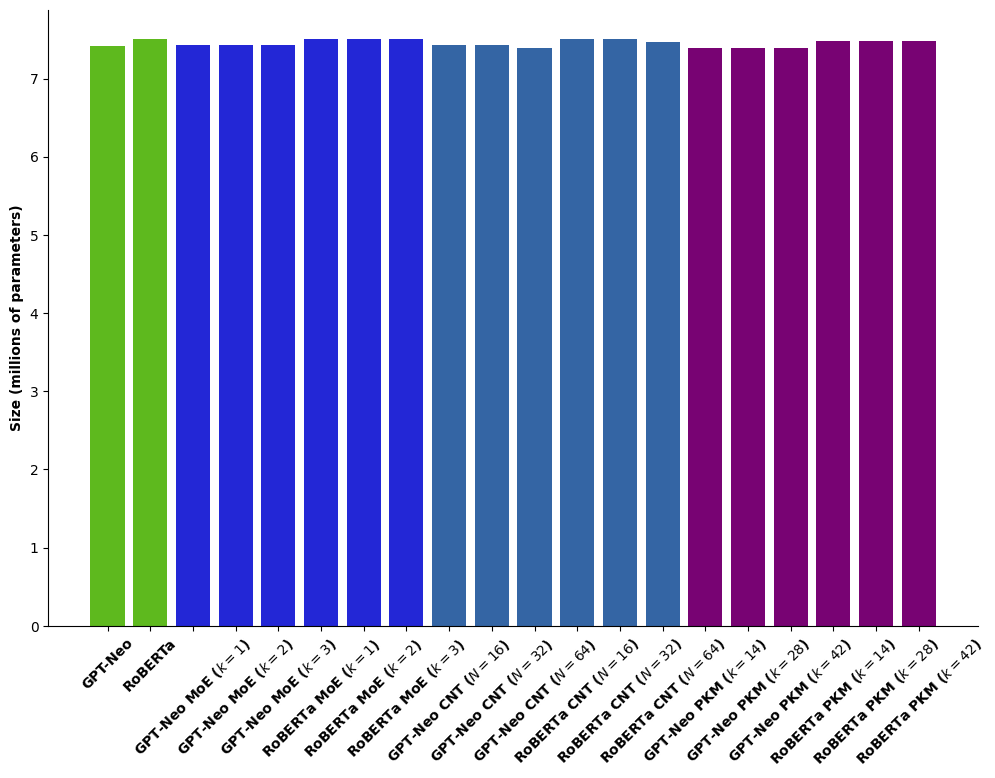

In [77]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(sizes)), sizes/1e6, tick_label = display_order, color = colors)
plt.xticks(rotation=45, weight='bold')
plt.ylabel('Size (millions of parameters)', weight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('model_sizes.png', transparent=True, bbox_inches = 'tight')
plt.show()
